In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_mail_df = pd.read_csv(r'C:\Users\Uday\OneDrive\Documents\Programs\DataScience\datasets\mail_data.csv')

In [45]:
raw_mail_df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
raw_mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

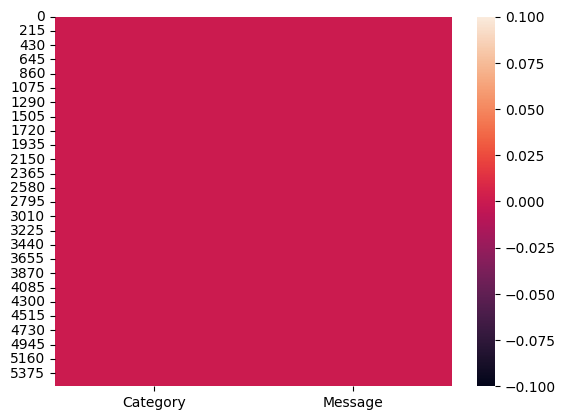

In [46]:
sns.heatmap(raw_mail_df.isnull())

In [7]:
mail_df = raw_mail_df.where((pd.notnull(raw_mail_df)),'')

In [8]:
mail_df.shape

(5572, 2)

In [9]:
mail_df.loc[mail_df['Category'] == 'spam', 'Category',] = 0
mail_df.loc[mail_df['Category'] == 'ham', 'Category',] = 1

In [12]:
X = mail_df['Message']
Y = mail_df['Category']

In [13]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [14]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [17]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
X_train.head()

4281    WINNER!! As a valued network customer you have...
585     So how's scotland. Hope you are not over showi...
4545                  when you and derek done with class?
3034                          Aight, lemme know what's up
2758                Yo we are watching a movie on netflix
Name: Message, dtype: object

In [25]:
print(X_train_features[0])

  (0, 3269)	0.22054637918276537
  (0, 268)	0.24268694798090706
  (0, 6770)	0.22054637918276537
  (0, 3683)	0.29820405490236296
  (0, 1759)	0.2170940285037797
  (0, 193)	0.29820405490236296
  (0, 1703)	0.3463668729960997
  (0, 5412)	0.26659686450403225
  (0, 5072)	0.18515987150578092
  (0, 697)	0.2603077338178364
  (0, 5272)	0.29820405490236296
  (0, 5624)	0.21107975758257638
  (0, 1994)	0.19237243410818475
  (0, 4440)	0.21107975758257638
  (0, 6774)	0.2393992502064106
  (0, 7026)	0.23108043306518108


In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_features, Y_train)

print(logistic_model.intercept_)
logistic_model.coef_

[2.37363775]


array([[-0.63626509, -1.25217943,  0.01791114, ..., -0.19653153,
         0.01240495,  0.01192663]])

In [31]:
logistic_model_train_predict = logistic_model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, logistic_model_train_predict)
print('Accuracy(train): ', accuracy_on_training_data)

Accuracy(train):  0.9653027039961714


In [32]:
logistic_model_test_predict = logistic_model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, logistic_model_test_predict)
print('Accuracy(test) ', accuracy_on_test_data)

Accuracy(test)  0.9662598707824839


In [33]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, logistic_model_test_predict))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, logistic_model_test_predict))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, logistic_model_test_predict)))

Mean Absolute Error :  0.03374012921751615
Mean Squared Error :  0.03374012921751615
Root Mean Squared Error :  0.18368486387701125


In [43]:
# input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_data_features = feature_extraction.transform(input_mail)

prediction = logistic_model.predict(input_data_features)

if (prediction[0]==1):
  print('Not Spam')
else:
  print('Spam')

Spam


In [47]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


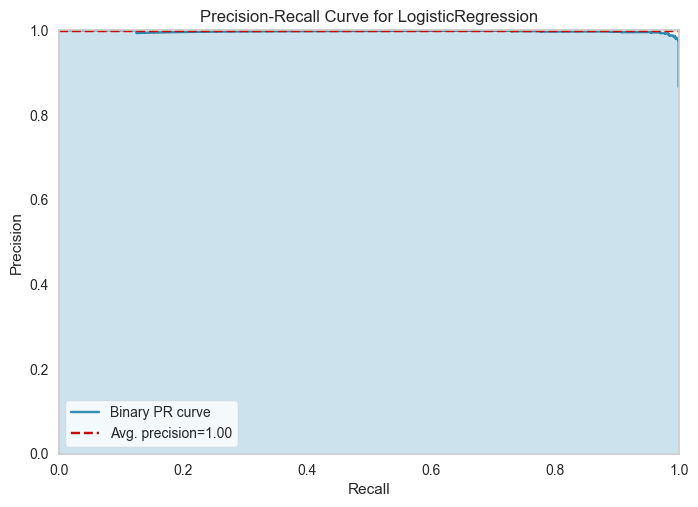

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [48]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(logistic_model)

viz.fit(X_train_features, Y_train)
viz.score(X_test_features, Y_test)
viz.show()